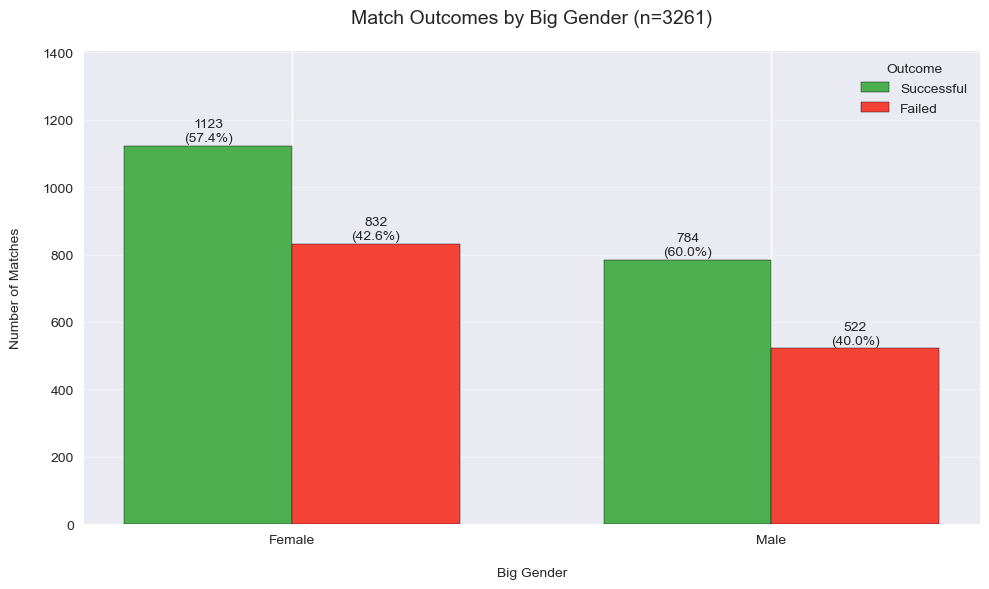

Contingency Table:
is_successful  False  True 
Big Gender                 
Female           832   1123
Male             522    784

Chi-Square Statistic: 2.05
p-value: 0.1517
Degrees of Freedom: 1

Expected Frequencies:
is_successful       False        True 
Big Gender                            
Female         811.735664  1143.264336
Male           542.264336   763.735664

Cramer's V: 0.025

Expected counts check:
All expected counts >=5: True

Statistical Report:
A chi-square test of independence was performed to examine the relationship between Big Gender and match success.
Results showed a statistically significant association, χ²(1, N=3261) = 2.05, p = 0.1517.
The effect size was small, Cramer's V = 0.025.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
df = pd.read_csv('new_novice.csv')
filtered_df = df[
    (df['Big Gender'].str.upper().isin(['MALE', 'FEMALE'])) &
    (df['is_successful'].isin([True, False]))
].copy()
filtered_df['Big Gender'] = filtered_df['Big Gender'].str.title()

# Calculate statistics
cross_tab = pd.crosstab(filtered_df['Big Gender'], filtered_df['is_successful'])
cross_tab = cross_tab.reindex(columns=[True, False], fill_value=0)

# Set up plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(cross_tab.index))  # Male/Female positions

# Plot bars
success_bars = plt.bar(x - bar_width/2, cross_tab[True], bar_width,
                      label='Successful', color='#4CAF50', edgecolor='black')
failure_bars = plt.bar(x + bar_width/2, cross_tab[False], bar_width,
                      label='Failed', color='#F44336', edgecolor='black')

# Add annotations
def autolabel(bars, percentages):
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}\n({pct:.1%})',
                ha='center', va='bottom')

success_pcts = cross_tab[True] / cross_tab.sum(axis=1)
failure_pcts = cross_tab[False] / cross_tab.sum(axis=1)

autolabel(success_bars, success_pcts)
autolabel(failure_bars, failure_pcts)

# Format plot
plt.title(f'Match Outcomes by Big Gender (n={len(filtered_df)})', pad=20, fontsize=14)
plt.xlabel('Big Gender', labelpad=15)
plt.ylabel('Number of Matches', labelpad=15)
plt.xticks(x, cross_tab.index)
plt.ylim(0, max(cross_tab.max()) * 1.25)
plt.legend(title='Outcome', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()
#Chi Square Test--------------------------------------------------------------------------------------------------

contingency_table = pd.crosstab(
    filtered_df['Big Gender'],
    filtered_df['is_successful']
)

print("Contingency Table:")
print(contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, 
                  index=contingency_table.index,
                  columns=contingency_table.columns))
n = filtered_df.shape[0]  # Total sample size
min_dim = min(contingency_table.shape) - 1  # For 2x2 table: 1

cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"\nCramer's V: {cramers_v:.3f}")
print("\nExpected counts check:")
print("All expected counts >=5:", (expected >= 5).all())

# Full report
alpha = 0.05
print(f"\nStatistical Report:")
print(f"A chi-square test of independence was performed to examine the relationship between Big Gender and match success.")
print(f"Results showed a statistically significant association, χ²({dof}, N={n}) = {chi2:.2f}, p = {p_value:.4f}.")
print(f"The effect size was small, Cramer's V = {cramers_v:.3f}.")

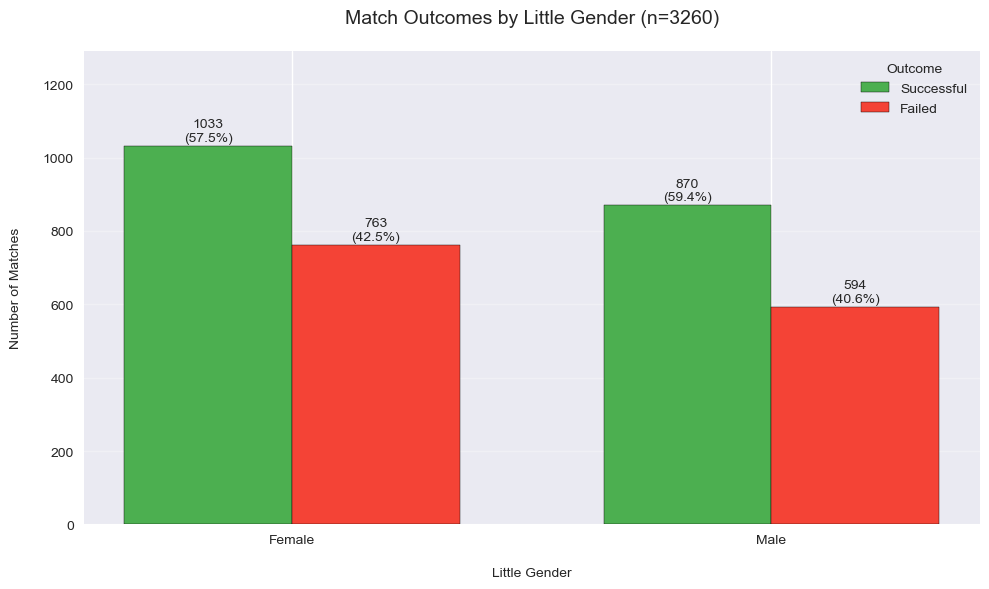

Contingency Table:
is_successful  False  True 
Little Gender              
Female           763   1033
Male             594    870

Chi-Square Statistic: 1.13
p-value: 0.2871
Degrees of Freedom: 1

Expected Frequencies:
is_successful       False        True 
Little Gender                         
Female         747.598773  1048.401227
Male           609.401227   854.598773

Cramer's V: 0.019

Expected counts check:
All expected counts >=5: True

Statistical Report:
A chi-square test of independence was performed to examine the relationship between Big Gender and match success.
Results showed a statistically significant association, χ²(1, N=3260) = 1.13, p = 0.2871.
The effect size was small, Cramer's V = 0.019.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# Load and prepare data
df = pd.read_csv('new_novice.csv')
filtered_df = df[
    (df['Little Gender'].str.upper().isin(['MALE', 'FEMALE'])) &
    (df['is_successful'].isin([True, False]))
].copy()
filtered_df['Little Gender'] = filtered_df['Little Gender'].str.title()

# Calculate statistics
cross_tab = pd.crosstab(filtered_df['Little Gender'], filtered_df['is_successful'])
cross_tab = cross_tab.reindex(columns=[True, False], fill_value=0)

# Set up plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(cross_tab.index))  # Male/Female positions

# Plot bars
success_bars = plt.bar(x - bar_width/2, cross_tab[True], bar_width,
                      label='Successful', color='#4CAF50', edgecolor='black')
failure_bars = plt.bar(x + bar_width/2, cross_tab[False], bar_width,
                      label='Failed', color='#F44336', edgecolor='black')

# Add annotations
def autolabel(bars, percentages):
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}\n({pct:.1%})',
                ha='center', va='bottom')

success_pcts = cross_tab[True] / cross_tab.sum(axis=1)
failure_pcts = cross_tab[False] / cross_tab.sum(axis=1)

autolabel(success_bars, success_pcts)
autolabel(failure_bars, failure_pcts)

# Format plot
plt.title(f'Match Outcomes by Little Gender (n={len(filtered_df)})', pad=20, fontsize=14)
plt.xlabel('Little Gender', labelpad=15)
plt.ylabel('Number of Matches', labelpad=15)
plt.xticks(x, cross_tab.index)
plt.ylim(0, max(cross_tab.max()) * 1.25)
plt.legend(title='Outcome', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

#Chi Square Test--------------------------------------------------------------------------------------------------

contingency_table = pd.crosstab(
    filtered_df['Little Gender'],
    filtered_df['is_successful']
)

print("Contingency Table:")
print(contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, 
                  index=contingency_table.index,
                  columns=contingency_table.columns))
n = filtered_df.shape[0]  # Total sample size
min_dim = min(contingency_table.shape) - 1  # For 2x2 table: 1

cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"\nCramer's V: {cramers_v:.3f}")
print("\nExpected counts check:")
print("All expected counts >=5:", (expected >= 5).all())

# Full report
alpha = 0.05
print(f"\nStatistical Report:")
print(f"A chi-square test of independence was performed to examine the relationship between Big Gender and match success.")
print(f"Results showed a statistically significant association, χ²({dof}, N={n}) = {chi2:.2f}, p = {p_value:.4f}.")
print(f"The effect size was small, Cramer's V = {cramers_v:.3f}.")